# Capstone Project: Malicious URL detection using Machine Learning and Artificial Intelligence


### Model Experiments with Tensorflow Keras
#### Explore models with high accuracy and low processing time

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"
import time
import warnings
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.compose import make_column_transformer
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
#Collect Initial Data
df3 = pd.read_csv('../data/finaldataset/maliciousurl_processed.csv')


In [4]:
df3.head()

,Unnamed: 0,url,type,category,url_len,domain,root_domain,count_at,count-question,count_hyphen,...,count-https,count-http,count-www,digits_count,hostname_length,sus_url,letters_count,short_url,use_of_ip,url_region
0,0,br-icloud.com.br,phishing,3,16,br-icloud.com.br,1310791,0,0,1,...,0,0,0,0,0,0,13,0,0,26
1,1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,58335668,0,0,0,...,0,0,0,1,0,0,29,0,0,72
2,2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,28611805,0,0,0,...,0,0,0,1,0,0,25,0,0,72
3,3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,89045308,0,1,1,...,0,1,0,7,17,0,60,0,0,18
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,76838614,0,1,1,...,0,1,0,22,23,0,199,0,0,72


In [5]:
df3.shape

(651191, 32)

###  Train/Test Split

With your data prepared, split it into a train and test set.

In [6]:
X = df3.drop(['url','type','category','domain'],axis=1)
y = df3['category']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Advance Modelling using Neural Networks Keras-Tensorflow

In [8]:


# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the feature data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model

scores = model.evaluate(X_test, y_test)
print(model.metrics_names)
acc, loss = scores[1]*100, scores[0]
print('Baseline: accuracy: {:.2f}%: loss: {:.2f}'.format(acc, loss))


Epoch 1/10
16280/16280 [==============================] - 23s 1ms/step - loss: -255340445696.0000 - accuracy: 0.3033
Epoch 2/10
16280/16280 [==============================] - 30s 2ms/step - loss: -4753051353088.0000 - accuracy: 0.3879
Epoch 3/10
16280/16280 [==============================] - 19s 1ms/step - loss: -25535207964672.0000 - accuracy: 0.4190
Epoch 4/10
16280/16280 [==============================] - 20s 1ms/step - loss: -82504543371264.0000 - accuracy: 0.4175
Epoch 5/10
16280/16280 [==============================] - 20s 1ms/step - loss: -202322839863296.0000 - accuracy: 0.4161
Epoch 6/10
16280/16280 [==============================] - 23s 1ms/step - loss: -418271094374400.0000 - accuracy: 0.4138
Epoch 7/10
16280/16280 [==============================] - 21s 1ms/step - loss: -769911072751616.0000 - accuracy: 0.4135
Epoch 8/10
16280/16280 [==============================] - 20s 1ms/step - loss: -1309735378747392.0000 - accuracy: 0.4141
Epoch 9/10
16280/16280 [======================

#### Generate predictions from the model

4070/4070 [==============================] - 3s 823us/step
[[85778     0     0     0]
 [19104     0     0     0]
 [ 6521     0     0     0]
 [18836     0     0     0]]


<Axes: >

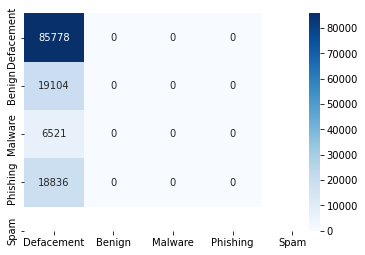

In [9]:

prediction_y = model.predict(X_test,verbose=1)

# Convert probabilities to class labels using argmax
prediction_y = np.argmax(prediction_y, axis=1)
# Create the confusion matrix
cm = confusion_matrix(y_test, prediction_y)

# Print the confusion matrix
print(cm)

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Defacement','Benign','Malware','Phishing','Spam'],
           yticklabels=['Defacement','Benign','Malware','Phishing','Spam'])

### Use GridSearchCV to determine Hyperparameters

In [21]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Define the Keras model
def create_model(optimizer='adam', activation='relu', neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(4, activation='softmax'))  # Assuming 4 output classes
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid for GridSearchCV
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'sigmoid'],
    'neurons': [10, 20, 30]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_proba = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
print(classification_report(y_test, y_pred_classes))



4070/4070 [==============================] - 6s 1ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

#### Generate predictions from the model

In [ ]:
prediction_y = model.predict(X_test,verbose=1)

# Convert probabilities to class labels using argmax
prediction_y = np.argmax(prediction_y, axis=1)
# Create the confusion matrix
cm = confusion_matrix(y_test, prediction_y)

# Print the confusion matrix
print(cm)

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Defacement','Benign','Malware','Phishing','Spam'],
           yticklabels=['Defacement','Benign','Malware','Phishing','Spam'])

Inference: As the accuracy of basic neural net model is low, I would explore it later after studying it more in depth.
1 . Keras sequential model gave be accuracy of 41.32% and loss -3747731017302016.00
